## Analysis and Visualisations - Census Project N4

In [1]:
import csv
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

In [2]:
df = pd.read_csv("cleaned_df.csv")

    
- <a href="#Age-Demographics">Age Demographics</a>
    - <a href="#Age-Pyramid">Age Pyramid</a>
    - <a href="#Age-Barplots">Age Barplots</a>
    - <a href="#Birth-Rates">Birth Rates</a>
    - <a href="#Death-Rates">Death Rates</a>
    
    
    
    
- <a href="#Economic-Analysis">Economic Analysis</a>
    - <a href="#Commuters">Commuters</a>
        - <a href="#Wordcloud-to-see-most-common-professions">Wordcloud to see mose common professions</a>
    - <a href="#Unemployment">Unemployment</a>
        - <a href="#Unemployment-plot-by-Age-Groups">Unemployment plot by Age Groups</a>
        - <a href="#Unemployment-count-by-Age-Group">Unemployment count by Age Group</a>
    - <a href="#Employed">Employed</a>
    - <a href="#Retired">Retired</a>
    
    
- <a href="#Marital-Status">Marital Status</a>
    - <a href="#Marital-Status-by-count">Marital Status by count</a>
    - <a href="#Marital-Status-by-median-age">Marital Status by median age</a>
    
    
- <a href="#Housing-Occupancy">Housing Occupancy</a>
    - <a href="#Occupancy-per-street">Occupancy per street</a>


- <a href="#Religious-Affiliations">Religious Affiliations</a>
  
    
- <a href="#Infirmities">Infirmities</a>   
 

### Age Demographics

#### Age Pyramid

In [3]:
#creating age bins and labels and creating a new column

age_bins = [0, 4, 9, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 122]

age_labels = ["0-5", "5-9", "11-15", "15-20","20-25", "25-30","30-35", "35-40", "40-45", "45-50", "50-55", 
          "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90", "90-95", "95-100", "100+"]

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [4]:
#count by Age Group and gender

agepyramid = df.groupby(['Age Group', 'Gender'])['Age'].size().unstack()

In [5]:
#checking data to go on the y axis

agepyramid.index

CategoricalIndex(['0-5', '5-9', '11-15', '15-20', '20-25', '25-30', '30-35',
                  '35-40', '40-45', '45-50', '50-55', '55-60', '60-65',
                  '65-70', '70-75', '75-80', '80-85', '85-90', '90-95',
                  '95-100', '100+'],
                 categories=['0-5', '5-9', '11-15', '15-20', '20-25', '25-30', '30-35', '35-40', ...], ordered=True, name='Age Group', dtype='category')

In [6]:
#checking negative male values

-agepyramid['Male'].values

array([-130, -213, -290, -275, -224, -189, -215, -254, -265, -201, -210,
       -186, -144, -123,  -97,  -72,  -50,  -24,   -8,   -6,   -2])

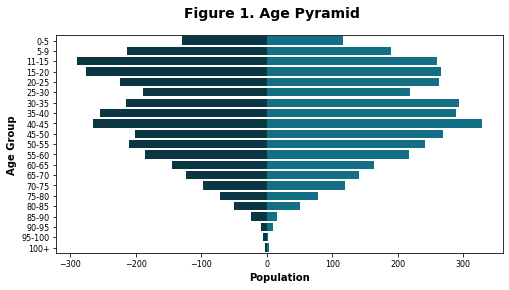

In [251]:
#setting the plot size
fig = plt.figure(figsize=(8,4))

#title 
fig.suptitle('Figure 1. Age Pyramid', fontsize=14, fontweight='bold')

#create the pyramid
age_py = sns.barplot(y = agepyramid.index, x = agepyramid['Female'].values, color = '#007a99', linewidth=0)
age_py = sns.barplot(y = agepyramid.index, x = -agepyramid['Male'].values, color = '#003d4d', linewidth=0)

#labelling the axes
age_py.set_xlabel("Population", fontweight = 'bold')
age_py.set_ylabel("Age Group", fontweight = 'bold')


age_py.xaxis.set_tick_params(labelsize=8)
age_py.yaxis.set_tick_params(labelsize=8)

In [ ]:
fig.suptitle('Figure 1. Age Pyramid')

In [8]:
#save the plot

agepy = age_py.get_figure()
fig.savefig("age_p.png")

#### Age Barplot

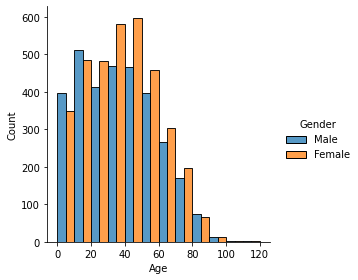

In [9]:
#age with gender split

age_multi = sns.displot(data = df, x = "Age", binwidth = 10,
                      hue = "Gender", 
                      multiple = "dodge", height=4)

In [10]:
age_multi.savefig('age_multi.png')

In [11]:
#count by Age Group and gender

agepyramid

Gender,Female,Male
Age Group,,
0-5,117,130
5-9,190,213
11-15,260,290
15-20,266,275
20-25,263,224
25-30,218,189
30-35,293,215
35-40,289,254
40-45,329,265


### Birth Rates 

#### Children age 0

In [12]:
#children aged 0
age_zero = df[df['Age'] == 0]

#children born over the past year as a fraction of total population
birth_rate = (len(age_zero)/len(df))*100000

print(f'The annual births per 100,000 is: {birth_rate:.0f}')

The annual births per 100,000 is: 640


#### Children age 4

In [13]:
#children aged 4
age_four = df[df['Age'] == 4]

##children born 4 years ago as a fraction of total population
ev_birth_rate = (len(age_four)/len(df)) * 100000

print(f'The births per 100,000 four years ago was: {ev_birth_rate:.0f}')

The births per 100,000 four years ago was: 1177


In [186]:
print(f'Births have decreased by: {((ev_birth_rate - birth_rate)/(ev_birth_rate) * 100):.2f}%')

Births have decreased by: 45.57%


### Death Rates

In [14]:
def dr_calc(a,b,c,d):
    """Takes four different ages (in 5 year intervals) and finds the difference between the two sets 
        dividing by 5 to find the annual rate and returns this number"""
    
    len1 = len(df[df['Age'].between(a,b)])
    len2 = len(df[df['Age'].between(c,d)])
    diff = (len1 - len2)/5
    return diff

In [15]:
#ages 56-60 and 61-65

early_60 = dr_calc(56,60,61,65)
early_60

10.8

In [16]:
#ages 66-70 and ages 71-75

early_70 = dr_calc(66,70,71,75)
early_70

10.0

In [17]:
#ages 76-80 and ages 81-85

early_80 = dr_calc(76,80,81,85)
early_80

8.0

In [18]:
#ages 86-90 and ages 91-95

early_90 = dr_calc(86,90,91,95)
early_90

2.4

In [19]:
#add up all the yearly rates
#total rate per 100000

d_rate = ((early_60+early_70+early_80+early_90)/len(df))*100000

print(f'The annual death rate per 100,000 people aged 56-95 is: {d_rate:.0f}')

The annual death rate per 100,000 people aged 56-95 is: 465


### Economic Analysis

#### Commuters

In [165]:
lodgers = len(df[df['Relationship to Head of House'] == 'Lodger'])
print(f'The number of lodgers in the town is: {lodgers}')

students = len(df[df['Occupation'].str.contains('[Ss]tudent') & (df['Age'] >= 18)])
print(f'The number of university students in the town is: {students}')

occupation_commuters = (len(df) * (2/25))
print(f'The number of occupations assumed to be commuters is: {occupation_commuters:.0f}')

total_comm = (lodgers + students + occupation_commuters)
print(f'The approximate total number of commuters is: {total_comm:.0f}')

percentage_of_town = (total_comm/len(df)) * 100
print(f'The percentage of commuters in the town is: {percentage_of_town:.0f}%')

The number of lodgers in the town is: 226
The number of university students in the town is: 514
The number of occupations assumed to be commuters is: 537
The approximate total number of commuters is: 1277
The percentage of commuters in the town is: 19%


In [181]:
#university students mean age

df[df['Occupation'].str.contains('[Ss]tudent') & (df['Age'] >= 18)].agg({'Age': 'mean'})

Age    20.178988
dtype: float64

In [182]:
#non university mean age

df[(df['Occupation'].str.contains('[Ss]tudent') == False) & (df['Age'] >= 18) & (df['Marital Status'] == 'Single')].agg({'Age': 'mean'})

Age    41.793347
dtype: float64

#### Wordcloud to see mose common professions

In [231]:
from wordcloud import WordCloud

In [232]:
fil = df[(df['Occupation'].str.contains('Unem|Child|Retired|University|Student') == False) & (df['Age'].between(16,64))]

In [233]:
my_list = fil['Occupation'].values
my_list

array(['Equities trader', 'Teaching laboratory technician',
       'Broadcast presenter', ..., 'Retail manager',
       'Education officer, community',
       'Product/process development scientist'], dtype=object)

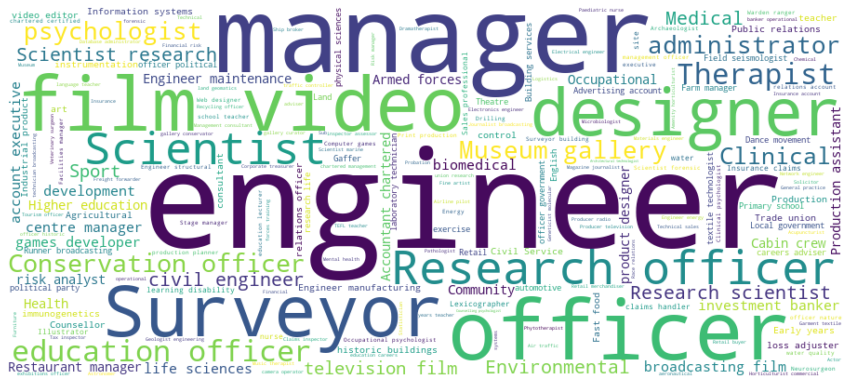

In [234]:
occu_cloud =(" ").join(my_list) #converting list to a string
wordcloud = WordCloud(width = 900, height = 400, background_color="white").generate(occu_cloud)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud"+".png", bbox_inches='tight')
plt.show()

#### Unemployment

In [21]:
#unemployment rate (those unemployed as a fraction of those economically active) - ONS

#unemployed and aged between 16 and 64
unem = df[(df['Occupation'].str.contains('[Uu]nem')) & 
          (df['Age'].between(16,64))]

#economically active, those aged 16 and over
econ_active = df[(df['Occupation'].str.contains('Child|Retired') == False) & 
                 (df['Age'] > 16)]

unem_mode = stats.mode(unem['Age'])

print(f'The unemployment rate is: {len(unem)/len(econ_active)*100:.2f}%')
print(f'Age with the most unemployed is: {unem_mode}')

The unemployment rate is: 8.69%
Age with the most unemployed is: 44


#### Unemployment plot by Age Groups

<AxesSubplot:xlabel='count', ylabel='Age Group'>

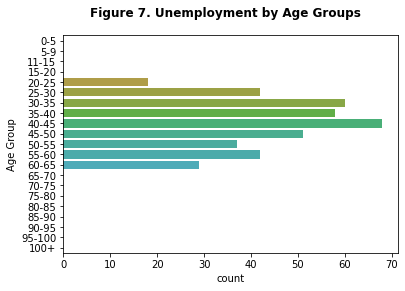

In [247]:
fig1 = plt.figure(figsize=(6,4))
fig1.suptitle('Figure 7. Unemployment by Age Groups', fontsize=12, 
              fontweight='bold', horizontalalignment='center')
sns.countplot(y = 'Age Group', data = unem)

In [23]:
fig1.savefig('unemployed.png')

#### Unemployment count by Age Group

In [24]:
#filter by those unemployed and less than retirement age

unem = df[(df['Occupation'].str.contains('[Uu]nem')) & (df['Age'] < 65)]
unem['Age Group'].value_counts().head(10)

40-45    68
30-35    60
35-40    58
45-50    51
25-30    42
55-60    42
50-55    37
60-65    29
20-25    18
5-9       0
Name: Age Group, dtype: int64

#### Employed

In [241]:
#%of employment by those economically active

empl = df[(df['Occupation'].str.contains('Unem|Child|Student|Retired') == False)]
(len(empl)/len(econ_active)) * 100

53.75335120643432

#### Retired

In [246]:
#% of those retired

ret = df[df['Occupation'].str.contains('Retired')]
(len(ret)/len(df)) * 100

9.174858504617218

### Marital Status

#### Marital Status by count

In [25]:
df['Marital Status'].value_counts()

Single            2368
Married           1914
Not Applicable    1517
Divorced           633
Widowed            282
Name: Marital Status, dtype: int64

In [173]:
df.describe(include = ['O'])

,Street,First Name,Surname,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,6714,6714,6714,6714,6714,6714,6714,6714,6714
unique,95,368,602,20,5,2,1041,4,10
top,Wood Bypass,Melissa,Smith,Head,Single,Female,Student,None,No Religion
freq,359,33,188,2455,2368,3536,1286,6697,2327


#### Marital Status by median age

Text(0, 0.5, 'Marital Status')

<Figure size 432x288 with 0 Axes>

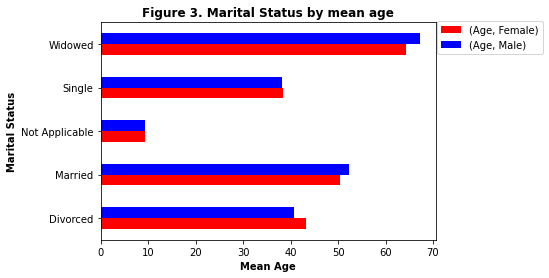

In [227]:
fig3 = plt.figure()
m_status = df.groupby(['Marital Status', 'Gender']).agg({'Age': 'mean'}).unstack().plot(kind='barh',
                                                                           color = ('red', 'blue'),
                                                                         figsize=(6,4))
m_status.legend(loc='center left', bbox_to_anchor=(0.99,0.93), ncol=1)
m_status.set_title('Figure 3. Marital Status by mean age', fontsize=12, fontweight='bold')
m_status.set_xlabel("Mean Age", fontweight = 'bold')
m_status.set_ylabel("Marital Status", fontweight = 'bold')

In [27]:
m1 = m_status.get_figure()
m1.savefig("marital_stat.png")

### Housing Occupancy

#### Occupancy per street

In [62]:
def select_street(a = df['Street'].sample(1).values[0]):
    """""This function takes a street name from a sample and returns the mean occupancy difference per household"""""
    
    occu = df.groupby("Street")
    occu_per_house = occu.get_group(a)['House Number'].value_counts() #calculates total occupants per house
    total_households = len(occu_per_house) #find total households in street
    print(f"The total number of households in {a} street is: {total_households} \n")
    
    med_occupancy = np.median(occu_per_house) #find median occupancy of the street
    print(f"The median occupancy per house is: {med_occupancy:.0f} \n")
    
    over_under = occu.get_group(a)['House Number'].value_counts().transform(lambda x: x - x.median())#subtracts total occupants from median occupancy
    print(f"The occupancy difference from the median for each household is:")
    
    return over_under.values #returns diff as an array

In [63]:
select_street()

The total number of households in Leeds Lodge street is: 26 

The median occupancy per house is: 4 

The occupancy difference from the median for each household is:


array([ 2.,  2.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1., -1., -2., -2., -2., -2., -2., -3.])

In [68]:
lodge_occ = df.groupby("Street")

#finding the number of people per house
lodge_occ1 = lodge_occ.get_group('Leeds Lodge')['House Number'].value_counts()

Text(0, 0.5, 'House Number')

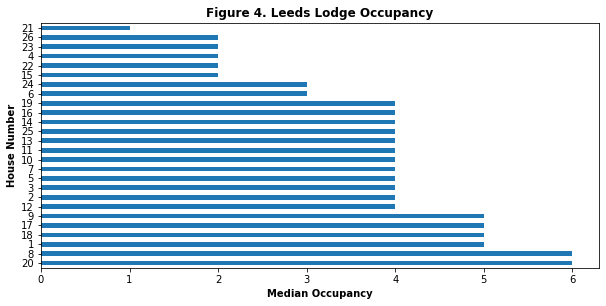

In [228]:
occ_plt = lodge_occ1.plot(kind ='barh', figsize=(10,4.5))
occ_plt.set_title("Figure 4. Leeds Lodge Occupancy", fontsize=12, fontweight='bold')
occ_plt.set_xlabel("Median Occupancy", fontweight = 'bold')
occ_plt.set_ylabel("House Number", fontweight = 'bold')

### Religious Affiliations

In [75]:
df['Religion'].unique()

array(['Intramystical', 'No Religion', 'Bioflow', 'Triangulism',
       'Utheism', 'Unknown', 'Undeclared', 'Convergeance', 'Septheism',
       'Washer'], dtype=object)

In [77]:
#filtering out minors (undeclared), no religion and unknown

rel_filt = df[(df['Religion'] != 'No Religion') & 
              (df['Religion'] != 'Unknown') &
             (df['Religion'] != 'Undeclared')]

In [126]:
df['Religion'].value_counts(normalize = True)

No Religion      0.346589
Intramystical    0.224010
Undeclared       0.196306
Triangulism      0.111707
Unknown          0.056896
Utheism          0.042895
Septheism        0.010873
Convergeance     0.006256
Bioflow          0.004021
Washer           0.000447
Name: Religion, dtype: float64

#### Religions by mode,mean,median,max,Q3

In [190]:
#finding mode, mean, median, max, min, Q3

df.groupby((rel_filt['Religion']))['Age'].agg([lambda x: pd.Series.mode(x).values[0],
                                               'mean', 'median','max','min',
                                               lambda x: np.quantile(x, q=0.75)])

,<lambda_0>,mean,median,max,min,<lambda_1>
Religion,,,,,,
Bioflow,27,45.555556,41.0,75,21,59.00
Convergeance,27,32.809524,29.0,68,18,34.75
Intramystical,53,51.019947,52.0,109,18,64.00
Septheism,31,39.054795,33.0,91,18,49.00
Triangulism,43,42.776000,41.5,115,18,51.00
Utheism,31,47.371528,52.0,91,16,63.00
Washer,24,29.666667,31.0,34,24,32.50


#### Religions by count

In [119]:
rel_filt['Religion'].value_counts()

Intramystical    1504
Triangulism       750
Utheism           288
Septheism          73
Convergeance       42
Bioflow            27
Washer              3
Name: Religion, dtype: int64

In [ ]:
their low member numbers would be a drawback if only they had more significant 

#### Unique Religions whiskers plot

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Intramystical'),
  Text(0, 1, 'Bioflow'),
  Text(0, 2, 'Triangulism'),
  Text(0, 3, 'Utheism'),
  Text(0, 4, 'Convergeance'),
  Text(0, 5, 'Septheism'),
  Text(0, 6, 'Washer')])

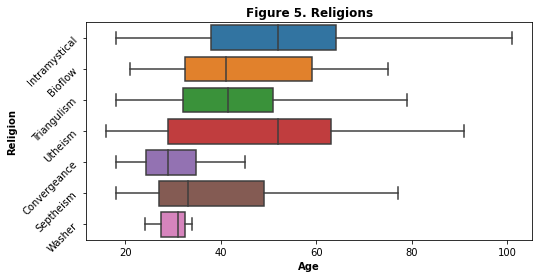

In [229]:
plt.figure(figsize = (8, 4))
ax = sns.boxplot(x='Age', y='Religion', data=rel_filt, showfliers=False)
ax.set_title('Figure 5. Religions', fontsize=12, fontweight='bold')
ax.set_xlabel("Age", fontweight = 'bold')
ax.set_ylabel("Religion", fontweight = 'bold')
plt.yticks(rotation=45)

In [224]:
#filtering by those with unidentified religions

rel_filt1 = df[(df['Religion'].str.contains('Unknown')) | 
               (df['Religion'].str.contains('No Religion')) &
               (df['Age'] > 16)]

#### Unidentified Religions by mode,mean,median,max,Q3

In [225]:
#mode, mean, median, max, min

df.groupby((rel_filt1['Religion']))['Age'].agg([lambda x: pd.Series.mode(x).values[0],
                                               'mean', 'median','max','min',
                                               lambda x: np.quantile(x, q=0.75)])

,<lambda_0>,mean,median,max,min,<lambda_1>
Religion,,,,,,
No Religion,32,42.629359,40,99,17,53
Unknown,16,26.801047,17,55,16,41


(array([0, 1]), [Text(0, 0, 'No Religion'), Text(0, 1, 'Unknown')])

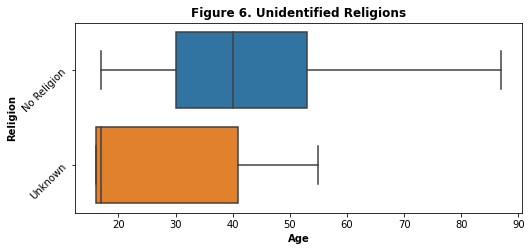

In [230]:
plt.figure(figsize = (8, 3.5))
ax1 = sns.boxplot(x='Age', y='Religion', data=rel_filt1, showfliers=False)
ax1.set_title('Figure 6. Unidentified Religions', fontsize=12, fontweight='bold')
ax1.set_xlabel("Age", fontweight = 'bold')
ax1.set_ylabel("Religion", fontweight = 'bold')
plt.yticks(rotation=45)

In [191]:
df['Religion'].value_counts(normalize = True)

No Religion      0.346589
Intramystical    0.224010
Undeclared       0.196306
Triangulism      0.111707
Unknown          0.056896
Utheism          0.042895
Septheism        0.010873
Convergeance     0.006256
Bioflow          0.004021
Washer           0.000447
Name: Religion, dtype: float64

In [131]:
rel_filt1[(rel_filt1['Age'] < 18)]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
14,14,7,Dublin Road,Elliott,Austin,16,Son,Not Applicable,Male,Student,None,Unknown,15-20
15,15,7,Dublin Road,Robert,Austin,16,Son,Not Applicable,Male,Student,None,Unknown,15-20
27,27,11,Dublin Road,Frederick,Harris,17,Son,Not Applicable,Male,Student,None,Unknown,15-20
31,31,12,Dublin Road,Martin,Bell,17,Son,Not Applicable,Male,Student,None,Unknown,15-20
48,48,18,Dublin Road,Alison,Fowler,16,Wife,Married,Female,Student,None,No Religion,15-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6610,6610,14,Dale Fort,Mohammed,Conway,16,Son,Not Applicable,Male,Student,None,Unknown,15-20
6665,6665,1,Williams Barn,Declan,Johnson,16,Son,Not Applicable,Male,Student,None,Unknown,15-20
6678,6678,1,Taylor Barracks,Jacob,Moss-Osborne,17,Son,Not Applicable,Male,Student,None,Unknown,15-20
6679,6679,1,Taylor Barracks,Denise,Moss-Osborne,17,Daughter,Not Applicable,Female,Student,None,Unknown,15-20


### Infirmities

In [132]:
#checking for unique infirmities

df['Infirmity'].unique()

array(['None', 'Nudisease', 'Silly', 'Skygazer'], dtype=object)

#### Number of over 65s

In [158]:
#finding total number of over 65

over_65 = df[df['Age'] >= 65]
print(f'The numnber of over 65s in the population is: {len(over_65)}')

The numnber of over 65s in the population is: 803


#### % over 65s

In [159]:
#finding % of over 65

print(f'The percentage of over 65s is: {(len(over_65)/len(df))*100:.2f}%')

The percentage of over 65s is: 11.96%


#### Number of over 80s

In [162]:
#calculate number of over 80s 

over_80 = df[df['Age'] >= 80]
print(f'The numnber of over 80s in the population is: {len(over_80)}')

The numnber of over 80s in the population is: 173


#### % over 80s

In [163]:
print(f'The percentage of over 80s is: {(len(over_80)/len(df))*100:.2f}%')

The percentage of over 80s is: 2.58%


#### Total count and mode per age group

In [149]:
#creating pivot table to find infirmities per age group with total count and mode age

pd.pivot_table(aged,
              index = ['Infirmity', 'Age Group'],
              aggfunc = ['count',lambda x: pd.Series.mode(x).values[0]],
              values = 'Age')

count <lambda>
                      Age      Age
Infirmity Age Group               
None      65-70       263       67
          70-75       217       70
          75-80       150       75
          80-85       101       82
          85-90        40       85
          90-95        18       91
          95-100        8       97
          100+          6      101